# Graphes et Nettoyage

## import des dataframes

In [6]:
import pandas as pd
import os
from tabulate import tabulate

# Chemin vers le répertoire contenant les fichiers CSV
directory_path = 'Database/'

# Liste des noms de fichiers CSV à importer
file_names = ['customers.csv', 'order_items.csv', 'order_pymts.csv', 'order_reviews.csv', 'orders.csv', 'products.csv', 'sellers.csv', 'translation.csv']

# Dictionnaire pour stocker les DataFrames
dataframes = {}

# Importer chaque fichier CSV et stocker dans le dictionnaire
import_results = []

for file_name in file_names:
    print(f"Importation du fichier : {file_name}")
    file_path = os.path.join(directory_path, file_name)
    df_name = file_name.replace('.csv', '')  # Nom de la clé du dictionnaire sans extension
    dataframes[df_name] = pd.read_csv(file_path)
    
    # Préparer les données pour le tableau
    df_head = dataframes[df_name].head(5)
    head_list = df_head.values.tolist()
    headers = df_head.columns.tolist()
    
    # Ajouter les résultats d'importation pour ce fichier
    import_results.append({
        'File': df_name,
        'Head': tabulate(head_list, headers=headers, tablefmt='pipe')
    })

# Afficher les résultats d'importation
print("\nRésultats d'importation des fichiers CSV :")
for result in import_results:
    print(f"\nFichier : {result['File']}")
    print(result['Head'])

# Accéder aux DataFrames importés
customers = dataframes['customers']
order_items = dataframes['order_items']
order_pymts = dataframes['order_pymts']
order_reviews = dataframes['order_reviews']
orders = dataframes['orders']
products = dataframes['products']
sellers = dataframes['sellers']
translation = dataframes['translation']


Importation du fichier : customers.csv
Importation du fichier : order_items.csv
Importation du fichier : order_pymts.csv
Importation du fichier : order_reviews.csv
Importation du fichier : orders.csv
Importation du fichier : products.csv
Importation du fichier : sellers.csv
Importation du fichier : translation.csv

Résultats d'importation des fichiers CSV :

Fichier : customers
|   index | customer_id                      | customer_unique_id               |   customer_zip_code_prefix | customer_city         | customer_state   |
|--------:|:---------------------------------|:---------------------------------|---------------------------:|:----------------------|:-----------------|
|       0 | 06b8999e2fba1a1fbc88172c00ba8bc7 | 861eff4711a542e4b93843c6dd7febb0 |                      14409 | franca                | SP               |
|       1 | 18955e83d337fd6b2def6b18a428ac77 | 290c77bc529b7ac935b93aa66c333dc3 |                       9790 | sao bernardo do campo | SP               |
|  

## Courbe du nombre de commandes en fonction du temps

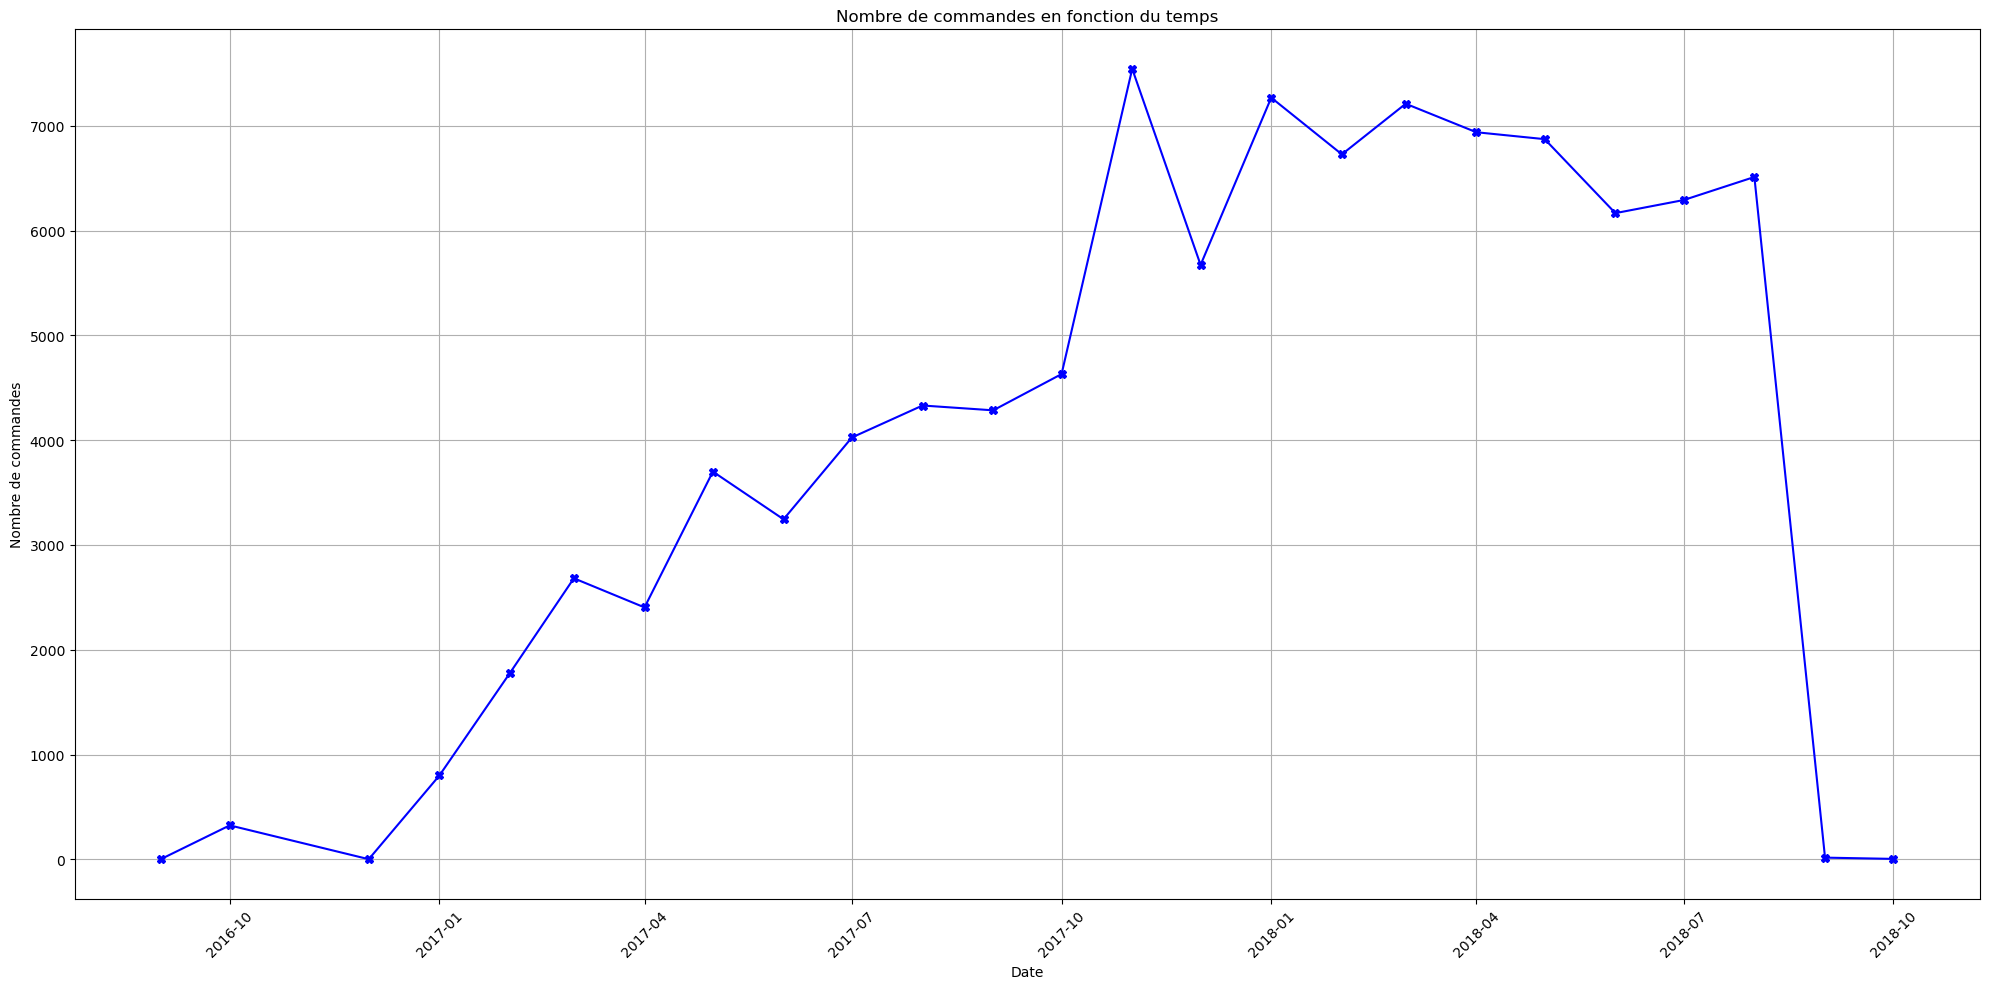

In [8]:
import matplotlib.pyplot as plt

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Grouper les commandes par date (par jour, mois, ou autre période si nécessaire)
order_counts = orders.groupby(orders['order_purchase_timestamp'].dt.to_period('M')).size()  # Comptage par jour

# Convertir l'index en datetime pour le tracé
order_counts.index = order_counts.index.to_timestamp()

# Tracer la courbe
plt.figure(figsize=(20, 10))
plt.plot(order_counts.index, order_counts.values, marker='X', linestyle='-', color='b')
plt.title('Nombre de commandes en fonction du temps')
plt.xlabel('Date')
plt.ylabel('Nombre de commandes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Barplot répartition des moyens de paiements

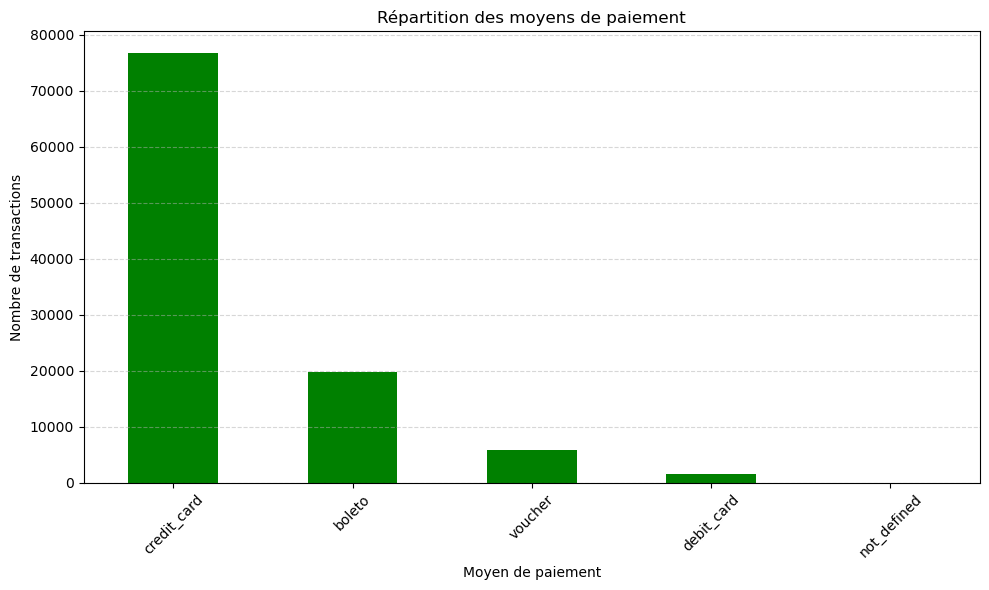

In [10]:
if 'payment_type' in order_pymts.columns:
    # Compter les occurrences de chaque moyen de paiement
    payment_counts = order_pymts['payment_type'].value_counts()
    
    # Tracer le barplot
    plt.figure(figsize=(10, 6))
    payment_counts.plot(kind='bar', color='green')
    plt.title('Répartition des moyens de paiement')
    plt.xlabel('Moyen de paiement')
    plt.ylabel('Nombre de transactions')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("La colonne 'payment_method' n'existe pas dans le DataFrame.")


## Barplot répartition des statuts de commande

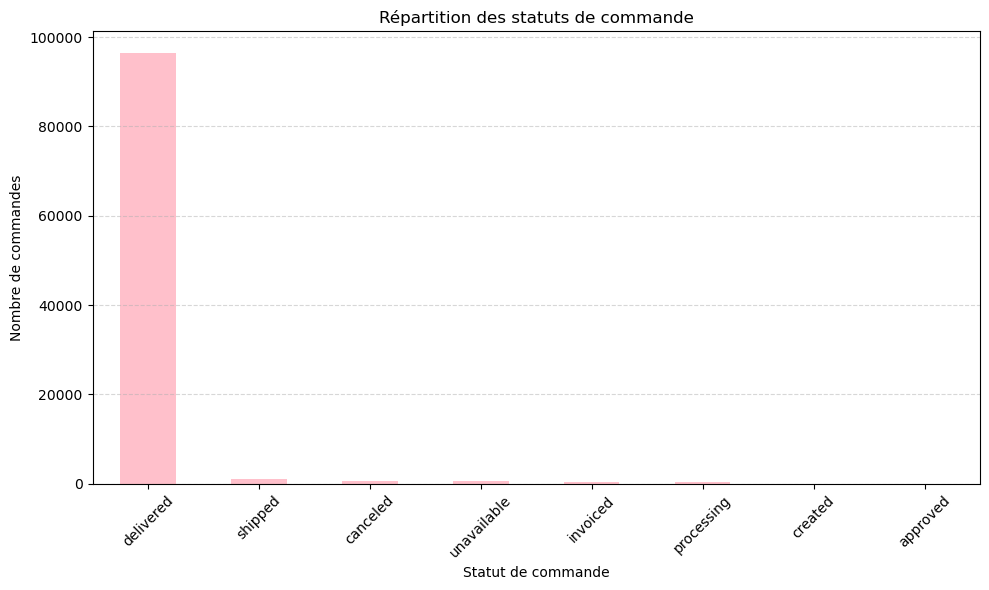

In [12]:
status_column = 'order_status'
if status_column in orders.columns:
    # Compter les occurrences de chaque statut de commande
    status_counts = orders[status_column].value_counts()
    
    # Tracer le barplot
    plt.figure(figsize=(10, 6))
    status_counts.plot(kind='bar', color='pink')
    plt.title('Répartition des statuts de commande')
    plt.xlabel('Statut de commande')
    plt.ylabel('Nombre de commandes')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print(f"La colonne '{status_column}' n'existe pas dans le DataFrame.")


## Histogramme nombre de paiements

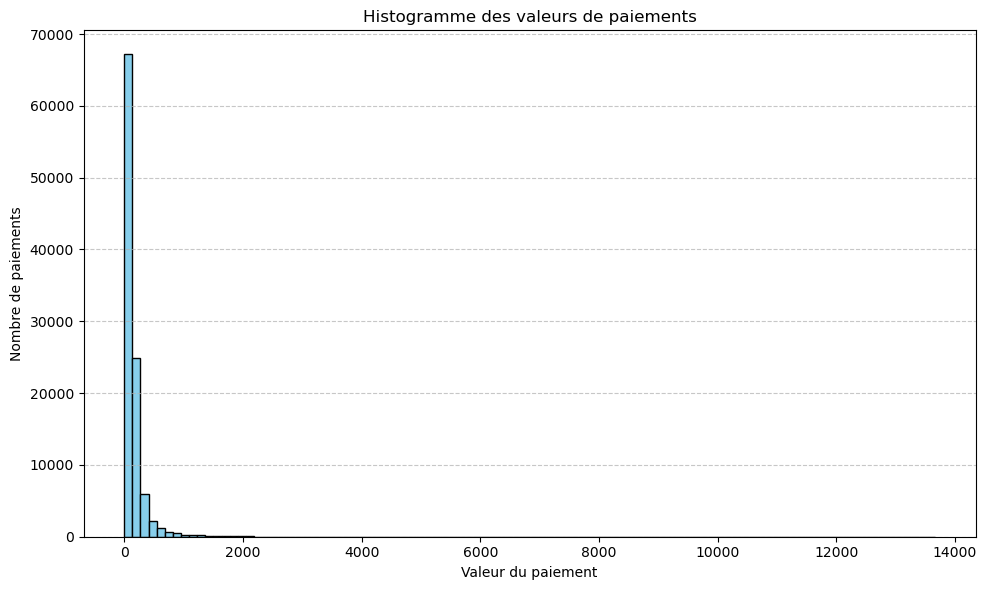

In [14]:
payment_value_column = 'payment_value'

if payment_value_column in order_pymts.columns:
    # Créer l'histogramme des valeurs de paiements
    plt.figure(figsize=(10, 6))
    plt.hist(order_pymts[payment_value_column], bins=100, color='skyblue', edgecolor='black')
    plt.title('Histogramme des valeurs de paiements')
    plt.xlabel('Valeur du paiement')
    plt.ylabel('Nombre de paiements')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print(f"La colonne '{payment_value_column}' n'existe pas dans le DataFrame.")


## Histogramme montant des commandes

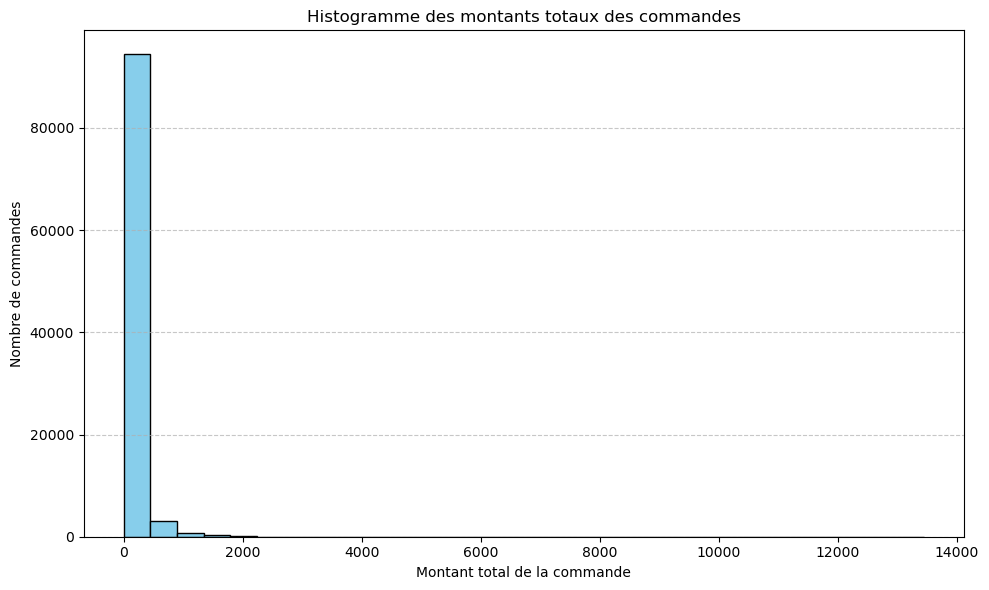

In [16]:
price_column = 'price'

if price_column in order_items.columns:
    # Calculer le montant total de chaque commande (en ne tenant compte que du prix)
    total_order_amounts = order_items.groupby('order_id')[price_column].sum()
    
    # Créer l'histogramme des montants totaux des commandes
    plt.figure(figsize=(10, 6))
    plt.hist(total_order_amounts.dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title('Histogramme des montants totaux des commandes')
    plt.xlabel('Montant total de la commande')
    plt.ylabel('Nombre de commandes')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print(f"La colonne '{price_column}' n'existe pas dans le DataFrame.")


## Nettoyage

### Commandes non livrées

In [19]:
if 'order_delivered_customer_date' in orders.columns:
    # Compter les commandes non livrées avant suppression
    non_delivered_orders_count_before = orders['order_delivered_customer_date'].isna().sum()
    print(f"Nombre de commandes non livrées avant suppression : {non_delivered_orders_count_before}")

    # Supprimer les commandes non livrées
    orders_delivered = orders.dropna(subset=['order_delivered_customer_date'])
    
    # Recalculer le nombre de commandes non livrées après suppression
    non_delivered_orders_count_after = orders_delivered['order_delivered_customer_date'].isna().sum()
    print(f"Nombre de commandes non livrées après suppression : {non_delivered_orders_count_after}")

    # Afficher le nombre total de commandes après suppression
    print(f"Nombre total de commandes après suppression : {orders_delivered.shape[0]}")
else:
    print("La colonne 'order_delivered_customer_date' n'existe pas dans le DataFrame.")


Nombre de commandes non livrées avant suppression : 2965
Nombre de commandes non livrées après suppression : 0
Nombre total de commandes après suppression : 96476


### Clients sans commande

In [21]:
# Calculer le nombre de clients sans commande après suppression des commandes non livrées
if 'customer_id' in customers.columns and 'customer_id' in orders_delivered.columns:
    # Trouver les clients avec au moins une commande dans le DataFrame filtré
    clients_with_orders = orders_delivered['customer_id'].unique()
    
    # Trouver tous les clients
    all_customers = customers['customer_id'].unique()
    
    # Trouver les clients sans commande
    clients_without_orders = set(all_customers) - set(clients_with_orders)
    
    clients_without_orders_count_after = len(clients_without_orders)
    print(f"Nombre de clients sans commande après suppression : {clients_without_orders_count_after}")

    # Nombre total de clients avant suppression
    total_customers_before = customers.shape[0]
    print(f"Nombre total de clients avant suppression des clients sans commande : {total_customers_before}")

    # Supprimer les clients sans commande du DataFrame customers
    customers_cleaned = customers[~customers['customer_id'].isin(clients_without_orders)]
    
    # Nombre total de clients après suppression
    total_customers_after = customers_cleaned.shape[0]
    print(f"Nombre total de clients après suppression des clients sans commande : {total_customers_after}")
    
    # Nombre de clients supprimés
    clients_removed = total_customers_before - total_customers_after
    print(f"Nombre de clients supprimés : {clients_removed}")
else:
    print("Les colonnes 'customer_id' dans 'customers' ou 'orders' n'existent pas dans le DataFrame.")


Nombre de clients sans commande après suppression : 2965
Nombre total de clients avant suppression des clients sans commande : 99441
Nombre total de clients après suppression des clients sans commande : 96476
Nombre de clients supprimés : 2965


# RFM

## Création des variables

In [24]:
import pandas as pd

# Assurez-vous que 'order_purchase_timestamp' est au format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# 1. Simuler la date d'aujourd'hui
simulated_today = pd.Timestamp('2018-10-18 17:30:18')
print(f"Date simulée d'aujourd'hui : {simulated_today}")

# 2. Date de la dernière commande dans le dataset
last_order_date = orders['order_purchase_timestamp'].max()
print(f"Date de la dernière commande : {last_order_date}")

# 3. Récence : Calculer le nombre de jours depuis la dernière commande pour chaque client
recency_df = orders.groupby('customer_id').agg(last_purchase=('order_purchase_timestamp', 'max')).reset_index()

# 4. Calculer la récence pour chaque client en utilisant la date simulée
recency_df['recency'] = (simulated_today - recency_df['last_purchase']).dt.days

# Afficher les dates de la dernière commande pour les clients avec une récence faible
print("\nDates de la dernière commande pour les clients avec récence faible :")
print(recency_df.sort_values(by='last_purchase', ascending=False).head())

# 5. Fréquence : Nombre total de commandes par client
frequency_df = orders.groupby('customer_id').size().reset_index(name='frequency')

# 6. Montant : Calculer le montant total dépensé par client à partir de la table order_items (prix * quantité)
monetary_df = order_items.groupby('order_id').agg(order_value=('price', 'sum')).reset_index()
monetary_df = pd.merge(orders[['order_id', 'customer_id']], monetary_df, on='order_id')
monetary_df = monetary_df.groupby('customer_id').agg(monetary=('order_value', 'sum')).reset_index()

# 7. Fusionner les variables RFM en une seule table
rfm_df = pd.merge(recency_df[['customer_id', 'recency']], frequency_df, on='customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')

# 8. Trier par récence (les plus récentes commandes en premier)
rfm_sorted_by_recency = rfm_df.sort_values(by='recency')

# Afficher les clients avec la récence la plus faible
print("\nClients ayant la récence la plus faible (commandes les plus récentes) :")
print(rfm_sorted_by_recency.head())


Date simulée d'aujourd'hui : 2018-10-18 17:30:18
Date de la dernière commande : 2018-10-17 17:30:18

Dates de la dernière commande pour les clients avec récence faible :
                            customer_id       last_purchase  recency
63970  a4b417188addbc05b26b72d5e44837a1 2018-10-17 17:30:18        1
51713  856336203359aa6a61bf3826f7d84c49 2018-10-16 20:16:02        1
29531  4c2ec60c29d10c34bd49cb88aa85cfc4 2018-10-03 18:55:29       14
74611  bf6181a85bbb4115736c0a8db1a53be3 2018-10-01 15:30:09       17
15595  2823ffda607a2316375088e0d00005ec 2018-09-29 09:13:03       19

Clients ayant la récence la plus faible (commandes les plus récentes) :
                            customer_id  recency  frequency  monetary
29063  4b7decb9b58e2569548b8b4c8e20e8d7       45          1    145.00
28365  49a6ae8a95c6a78d90945b983ab1ecfc       50          1    103.69
52937  898b7fee99c4e42170ab69ba59be0a8b       50          1     84.99
4331   0b5f6687d659478f1747caed607c4ec5       50          1    

## Scoring

In [26]:
import pandas as pd

# Assurez-vous que 'order_purchase_timestamp' est au format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# 1. Simuler la date d'aujourd'hui (18 octobre 2018)
simulated_today = pd.Timestamp('2018-10-18 17:30:18')
print(f"Date simulée d'aujourd'hui : {simulated_today}")

# 2. Date de la dernière commande dans le dataset
last_order_date = orders['order_purchase_timestamp'].max()
print(f"Date de la dernière commande : {last_order_date}")

# 3. Récence : Calculer le nombre de jours depuis la dernière commande pour chaque client
recency_df = orders.groupby('customer_id').agg(last_purchase=('order_purchase_timestamp', 'max')).reset_index()
recency_df['recency'] = (simulated_today - recency_df['last_purchase']).dt.days

# 4. Fréquence : Nombre total de commandes par client
frequency_df = orders.groupby('customer_id').size().reset_index(name='frequency')

# 5. Montant : Calculer le montant total dépensé par client à partir de la table order_items (prix * quantité)
monetary_df = order_items.groupby('order_id').agg(order_value=('price', 'sum')).reset_index()
monetary_df = pd.merge(orders[['order_id', 'customer_id']], monetary_df, on='order_id')
monetary_df = monetary_df.groupby('customer_id').agg(monetary=('order_value', 'sum')).reset_index()

# 6. Fusionner les variables RFM en une seule table
rfm_df = pd.merge(recency_df[['customer_id', 'recency']], frequency_df, on='customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')

# 7. Calculer le score RFM
def score_rfm(df):
    df['recency_score'] = pd.qcut(df['recency'], 4, labels=False, duplicates='drop').fillna(-1)
    df['recency_score'] = 5 - df['recency_score']  # Inverser le score de récence

    df['frequency_score'] = pd.qcut(df['frequency'], 4, labels=False, duplicates='drop').fillna(-1)
    df['frequency_score'] = 1 + df['frequency_score']  # Plus la fréquence est basse, plus le score est bas

    df['monetary_score'] = pd.qcut(df['monetary'], 4, labels=False, duplicates='drop').fillna(-1)
    df['monetary_score'] = 1 + df['monetary_score']  # Plus le montant est élevé, plus le score est élevé
    
    # Concaténer les scores dans le format "recency_score-frequency_score-monetary_score"
    df['rfm_score'] = df['recency_score'].astype(int).astype(str) + '-' + df['frequency_score'].astype(int).astype(str) + '-' + df['monetary_score'].astype(int).astype(str)
    return df

# Appliquer la fonction de scoring
rfm_df = score_rfm(rfm_df)

# Afficher les clients avec leurs scores RFM
print("\nClients avec leurs scores RFM :")
print(rfm_df[['customer_id', 'recency', 'frequency', 'monetary', 'rfm_score']].head())


Date simulée d'aujourd'hui : 2018-10-18 17:30:18
Date de la dernière commande : 2018-10-17 17:30:18

Clients avec leurs scores RFM :
                        customer_id  recency  frequency  monetary rfm_score
0  00012a2ce6f8dcda20d059ce98491703      338          1     89.80     3-0-3
1  000161a058600d5901f007fab4c27140      459          1     54.90     2-0-2
2  0001fd6190edaaf884bcaf3d49edf079      597          1    179.99     2-0-4
3  0002414f95344307404f0ace7a26f1d5      428          1    149.90     2-0-3
4  000379cdec625522490c315e70c7a9fb      199          1     93.00     4-0-3


## Graphe

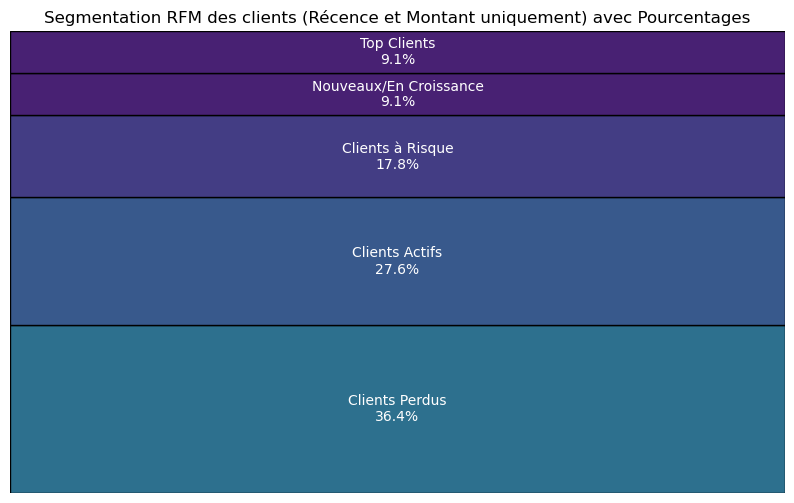

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Assurez-vous que 'order_purchase_timestamp' est au format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# 1. Simuler la date d'aujourd'hui (18 octobre 2018)
simulated_today = pd.Timestamp('2018-10-18 17:30:18')

# 2. Récence : Calculer le nombre de jours depuis la dernière commande pour chaque client
recency_df = orders.groupby('customer_id').agg(last_purchase=('order_purchase_timestamp', 'max')).reset_index()
recency_df['recency'] = (simulated_today - recency_df['last_purchase']).dt.days

# 3. Fréquence : Nombre total de commandes par client
frequency_df = orders.groupby('customer_id').size().reset_index(name='frequency')

# 4. Montant : Calculer le montant total dépensé par client
monetary_df = order_items.groupby('order_id').agg(order_value=('price', 'sum')).reset_index()
monetary_df = pd.merge(orders[['order_id', 'customer_id']], monetary_df, on='order_id')
monetary_df = monetary_df.groupby('customer_id').agg(monetary=('order_value', 'sum')).reset_index()

# 5. Fusionner les variables RFM en une seule table
rfm_df = pd.merge(recency_df[['customer_id', 'recency']], frequency_df, on='customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')

# 6. Calculer le score RFM sans la fréquence
def score_rfm(df):
    df['recency_score'] = pd.qcut(df['recency'], 4, labels=False, duplicates='drop').fillna(-1)
    df['recency_score'] = 5 - df['recency_score']  # Plus la récence est faible, plus le score est élevé
    
    df['monetary_score'] = pd.qcut(df['monetary'], 4, labels=False, duplicates='drop').fillna(-1)
    df['monetary_score'] = 1 + df['monetary_score']  # Plus le montant est élevé, plus le score est élevé

    # Concaténer les scores dans le format "recency_score-monetary_score"
    df['rfm_score'] = df['recency_score'].astype(int).astype(str) + '-' + df['monetary_score'].astype(int).astype(str)
    return df

# Appliquer la fonction de scoring
rfm_df = score_rfm(rfm_df)

# 7. Segmenter les clients en fonction de la récence et du montant monétaire (sans fréquence)
def segment_rfm(df):
    conditions = [
        (df['recency_score'] == 5) & (df['monetary_score'] >= 4),  # Clients récents et dépensant beaucoup
        (df['recency_score'] >= 3) & (df['monetary_score'] == 3),  # Clients actifs et dépensant bien
        (df['recency_score'] <= 2) & (df['monetary_score'] >= 3),  # Clients à risque mais dépensant beaucoup
        (df['recency_score'] >= 1) & (df['monetary_score'] == 2),  # Clients perdus et dépensant peu
        (df['recency_score'] == 5) & (df['monetary_score'] <= 2)   # Nouveaux clients ou en croissance
    ]
    choices = ['Top Clients', 'Clients Actifs', 'Clients à Risque', 'Clients Perdus', 'Nouveaux/En Croissance']
    df['segment'] = np.select(conditions, choices, default=None)  # Retirer la catégorie "Autres"
    df = df.dropna(subset=['segment'])  # Supprimer les lignes qui ne correspondent à aucun segment
    return df

rfm_df = segment_rfm(rfm_df)

# 8. Visualiser les segments via un treemap avec Matplotlib (sans squarify)
segment_counts = rfm_df['segment'].value_counts()

# Fonction pour dessiner des rectangles pour le treemap avec % dans les labels
def draw_treemap(ax, labels, sizes):
    total_size = sum(sizes)
    x, y = 0, 0
    width = 1.0
    for label, size in zip(labels, sizes):
        height = size / total_size
        percentage = size / total_size * 100  # Calcul du pourcentage
        rect = Rectangle((x, y), width, height, edgecolor='black', facecolor=plt.cm.viridis(size/total_size))
        ax.add_patch(rect)
        ax.text(x + 0.5 * width, y + 0.5 * height, f"{label}\n{percentage:.1f}%", ha='center', va='center', fontsize=10, color='white')
        y += height

# Dessiner le treemap
fig, ax = plt.subplots(figsize=(10, 6))
draw_treemap(ax, segment_counts.index, segment_counts.values)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title("Segmentation RFM des clients (Récence et Montant uniquement) avec Pourcentages")
ax.set_axis_off()
plt.show()


## Nouvelles variables

In [30]:
import pandas as pd

# Assurez-vous que 'order_purchase_timestamp' et 'order_delivered_customer_date' sont au format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# 1. Simuler la date d'aujourd'hui (18 octobre 2018)
simulated_today = pd.Timestamp('2018-10-18 17:30:18')
print(f"Date simulée d'aujourd'hui : {simulated_today}")

# 2. Date de la dernière commande dans le dataset
last_order_date = orders['order_purchase_timestamp'].max()
print(f"Date de la dernière commande : {last_order_date}")

# 3. Récence : Calculer le nombre de jours depuis la dernière commande pour chaque client
recency_df = orders.groupby('customer_id').agg(last_purchase=('order_purchase_timestamp', 'max')).reset_index()
recency_df['recency'] = (simulated_today - recency_df['last_purchase']).dt.days

# 4. Montant : Calculer le montant total dépensé par client à partir de la table order_items (prix * quantité)
monetary_df = order_items.groupby('order_id').agg(order_value=('price', 'sum')).reset_index()
monetary_df = pd.merge(orders[['order_id', 'customer_id']], monetary_df, on='order_id')
monetary_df = monetary_df.groupby('customer_id').agg(monetary=('order_value', 'sum')).reset_index()

# 5. Score des avis : Calculer le score moyen des avis par client
review_score_df = order_reviews.groupby('order_id').agg(avg_review_score=('review_score', 'mean')).reset_index()
review_score_df = pd.merge(orders[['order_id', 'customer_id']], review_score_df, on='order_id')
review_score_df = review_score_df.groupby('customer_id').agg(avg_review_score=('avg_review_score', 'mean')).reset_index()

# 6. Délai de livraison : Calculer le délai de livraison moyen par client (en excluant les valeurs manquantes)
delivery_delay_df = orders.copy()
delivery_delay_df['delivery_delay'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days
delivery_delay_df = delivery_delay_df[~delivery_delay_df['delivery_delay'].isna()]  # Supprimer les valeurs manquantes
delivery_delay_df = delivery_delay_df.groupby('customer_id').agg(avg_delivery_delay=('delivery_delay', 'mean')).reset_index()

# 7. Nombre d'articles : Calculer le nombre total d'articles commandés par client
items_df = order_items.groupby('order_id').agg(total_items=('order_item_id', 'count')).reset_index()
items_df = pd.merge(orders[['order_id', 'customer_id']], items_df, on='order_id')
items_df = items_df.groupby('customer_id').agg(total_items=('total_items', 'sum')).reset_index()

# 8. Fusionner les variables RFM et les nouvelles variables en une seule table
rfm_df = pd.merge(recency_df[['customer_id', 'recency']], monetary_df, on='customer_id')
rfm_df = pd.merge(rfm_df, review_score_df, on='customer_id')
rfm_df = pd.merge(rfm_df, delivery_delay_df, on='customer_id', how='left')  # Utiliser une jointure gauche pour conserver tous les clients
rfm_df = pd.merge(rfm_df, items_df, on='customer_id')

# 9. Calculer le score RFM avec les nouvelles variables (sans la fréquence)
def score_rfm(df):
    df['recency_score'] = pd.qcut(df['recency'], 4, labels=False, duplicates='drop').fillna(-1)
    df['recency_score'] = 5 - df['recency_score']  # Inverser le score de récence

    df['monetary_score'] = pd.qcut(df['monetary'], 4, labels=False, duplicates='drop').fillna(-1)
    df['monetary_score'] = 1 + df['monetary_score']  # Plus le montant est élevé, plus le score est élevé

    df['review_score'] = pd.qcut(df['avg_review_score'], 4, labels=False, duplicates='drop').fillna(-1)
    df['review_score'] = 1 + df['review_score']  # Plus le score d'avis est élevé, plus le score est élevé

    df['delivery_score'] = pd.qcut(df['avg_delivery_delay'], 4, labels=False, duplicates='drop').fillna(-1)
    df['delivery_score'] = 5 - df['delivery_score']  # Moins le délai de livraison est long, plus le score est élevé
    
    df['items_score'] = pd.qcut(df['total_items'], 4, labels=False, duplicates='drop').fillna(-1)
    df['items_score'] = 1 + df['items_score']  # Plus il y a d'articles commandés, plus le score est élevé

    # Concaténer les scores dans le format "recency_score-monetary_score-review_score-delivery_score-items_score"
    df['rfm_score'] = (
        df['recency_score'].astype(int).astype(str) + '-' +
        df['monetary_score'].astype(int).astype(str) + '-' +
        df['review_score'].astype(int).astype(str) + '-' +
        df['delivery_score'].astype(int).astype(str) + '-' +
        df['items_score'].astype(int).astype(str)
    )
    return df

# Appliquer la fonction de scoring
rfm_df = score_rfm(rfm_df)

# Afficher les clients avec leurs scores RFM et nouvelles variables
print("\nClients avec leurs scores RFM et nouvelles variables :")
print(rfm_df[['customer_id', 'recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items', 'rfm_score']].head())


Date simulée d'aujourd'hui : 2018-10-18 17:30:18
Date de la dernière commande : 2018-10-17 17:30:18

Clients avec leurs scores RFM et nouvelles variables :
                        customer_id  recency  monetary  avg_review_score  \
0  00012a2ce6f8dcda20d059ce98491703      338     89.80               1.0   
1  000161a058600d5901f007fab4c27140      459     54.90               4.0   
2  0001fd6190edaaf884bcaf3d49edf079      597    179.99               5.0   
3  0002414f95344307404f0ace7a26f1d5      428    149.90               5.0   
4  000379cdec625522490c315e70c7a9fb      199     93.00               4.0   

   avg_delivery_delay  total_items  rfm_score  
0                13.0            1  3-3-1-3-1  
1                 9.0            1  2-2-1-4-1  
2                 5.0            1  2-4-2-5-1  
3                28.0            1  2-3-2-2-1  
4                11.0            1  4-3-1-3-1  


## KMeans/CAH/DBscan

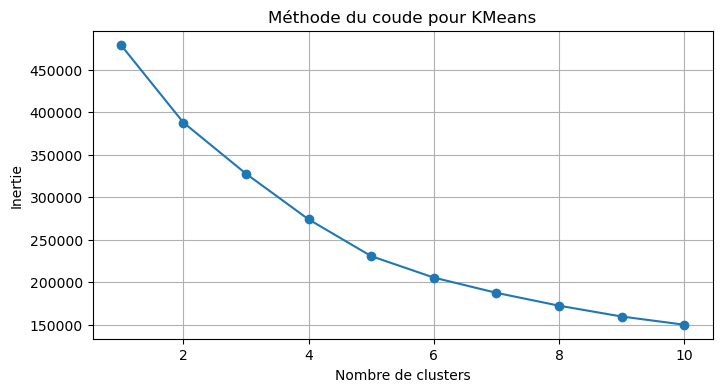

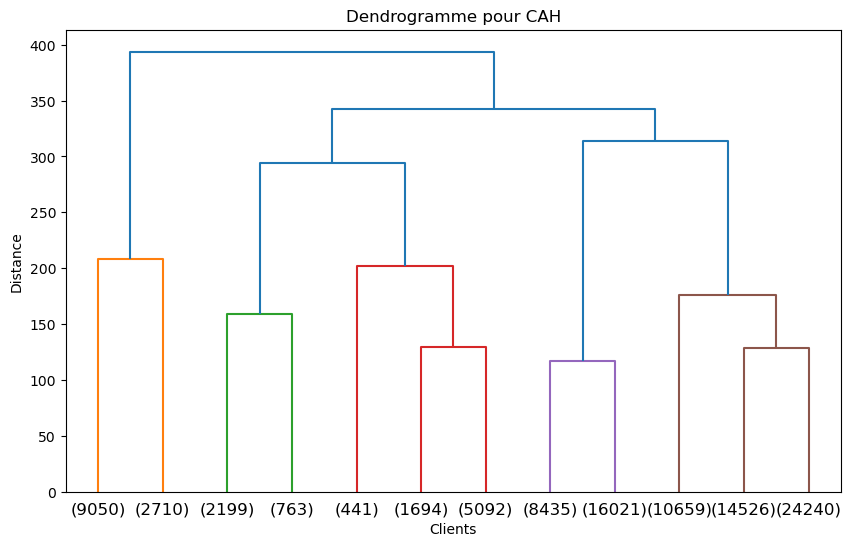

                        customer_id  kmeans_cluster  cah_cluster  \
0  00012a2ce6f8dcda20d059ce98491703             0.0          1.0   
1  000161a058600d5901f007fab4c27140             2.0          3.0   
2  0001fd6190edaaf884bcaf3d49edf079             2.0          3.0   
3  0002414f95344307404f0ace7a26f1d5             2.0          3.0   
4  000379cdec625522490c315e70c7a9fb             1.0          2.0   

   dbscan_cluster  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  


In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# 1. Préparation et normalisation des données
X = rfm_df[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']]

# Vérifier et gérer les valeurs manquantes
X = X.dropna()  # Supprime les lignes avec des valeurs manquantes
# X = X.fillna(X.mean())  # Alternativement, vous pouvez imputer les NaN par la moyenne

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Clustering avec KMeans
# Trouver le nombre optimal de clusters avec la méthode du coude
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)  # Explicitement définir n_init à 10
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Méthode du coude pour KMeans")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()

# Appliquer KMeans avec un nombre de clusters choisi
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)  # Explicitement définir n_init à 10
rfm_df.loc[X.index, 'kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# 3. Clustering avec CAH (Dendrogramme)
plt.figure(figsize=(10, 6))

# Dendrogramme avec un maximum de 10 clusters
dendrogram = sch.dendrogram(
    sch.linkage(X_scaled, method='ward'),
    truncate_mode='lastp',  # Limiter le nombre de clusters affichés
    p=12,                   # Nombre maximum de clusters à afficher
)

plt.title('Dendrogramme pour CAH')
plt.xlabel('Clients')
plt.ylabel('Distance')
plt.show()

# Appliquer CAH avec découpage en clusters (par exemple : 4 clusters)
cah = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
rfm_df.loc[X.index, 'cah_cluster'] = cah.fit_predict(X_scaled)

# 4. Clustering avec DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm_df.loc[X.index, 'dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Afficher un aperçu des clusters
print(rfm_df[['customer_id', 'kmeans_cluster', 'cah_cluster', 'dbscan_cluster']].head())


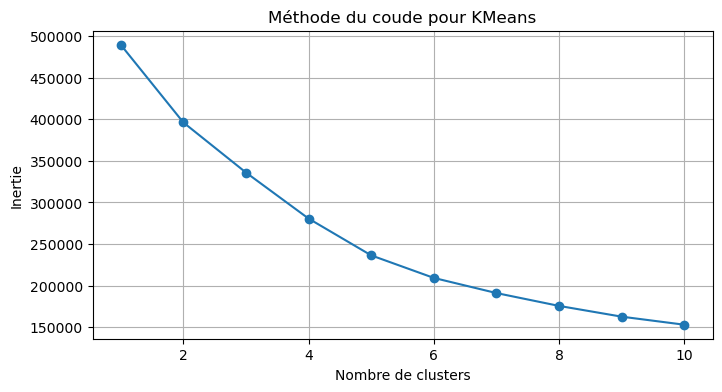

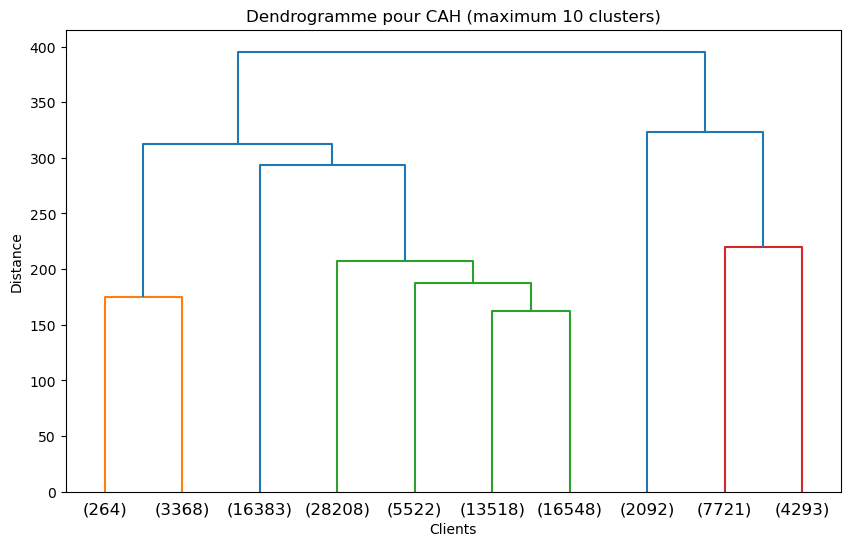

                        customer_id  kmeans_cluster  cah_cluster  \
0  00012a2ce6f8dcda20d059ce98491703             3.0          5.0   
1  000161a058600d5901f007fab4c27140             1.0          2.0   
2  0001fd6190edaaf884bcaf3d49edf079             1.0          4.0   
3  0002414f95344307404f0ace7a26f1d5             0.0          4.0   
4  000379cdec625522490c315e70c7a9fb             6.0          6.0   

   dbscan_cluster  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  


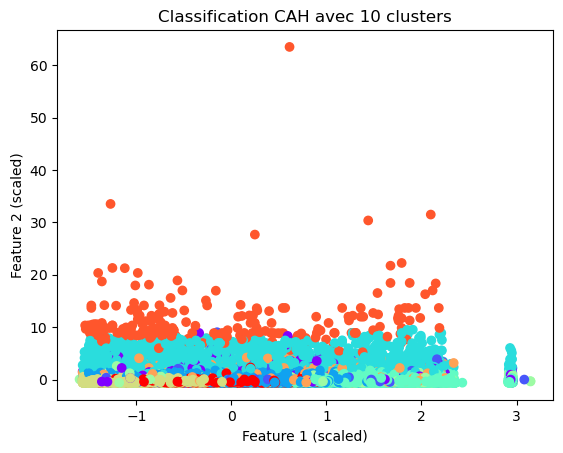

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# 1. Préparation et normalisation des données
X = rfm_df[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']]

# Vérifier et gérer les valeurs manquantes
#X = X.dropna()  # Supprime les lignes avec des valeurs manquantes
X = X.fillna(X.mean()) 

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Clustering avec KMeans
# Trouver le nombre optimal de clusters avec la méthode du coude
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)  # Explicitement définir n_init à 10
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Méthode du coude pour KMeans")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()

# Appliquer KMeans avec un nombre de clusters choisi
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10)  # Explicitement définir n_init à 10
rfm_df.loc[X.index, 'kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# 3. Clustering avec CAH (Dendrogramme)
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(
    sch.linkage(X_scaled, method='ward'),
    truncate_mode='lastp',  # Limiter le nombre de clusters affichés
    p=10,                   # Nombre maximum de clusters à afficher
)

plt.title('Dendrogramme pour CAH (maximum 10 clusters)')
plt.xlabel('Clients')
plt.ylabel('Distance')
plt.show()

# Appliquer CAH avec découpage en clusters 
cah = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
rfm_df.loc[X.index, 'cah_cluster'] = cah.fit_predict(X_scaled)

# 4. Clustering avec DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm_df.loc[X.index, 'dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Afficher un aperçu des clusters
print(rfm_df[['customer_id', 'kmeans_cluster', 'cah_cluster', 'dbscan_cluster']].head())

# Afficher la classification CAH
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cah.labels_, cmap='rainbow')
plt.title(f"Classification CAH avec {10} clusters")
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()


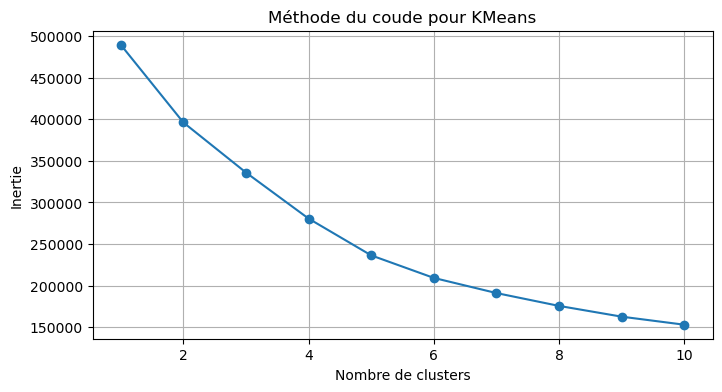

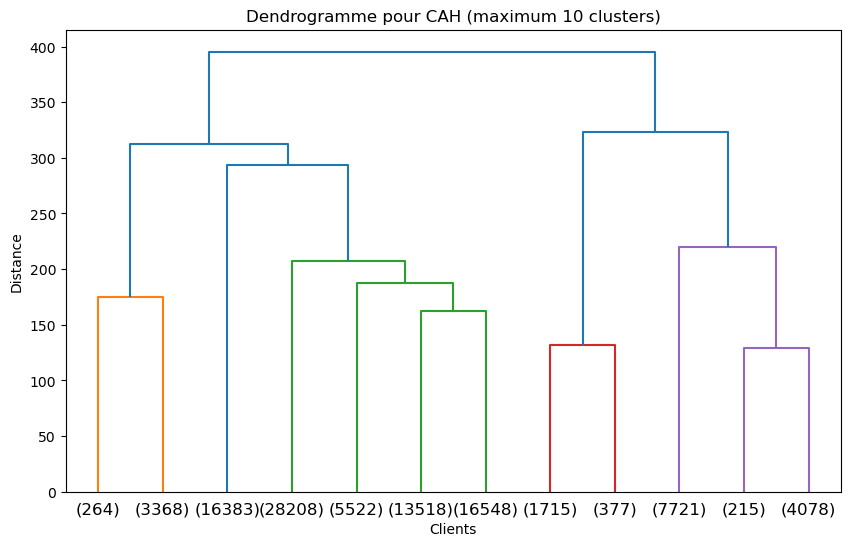

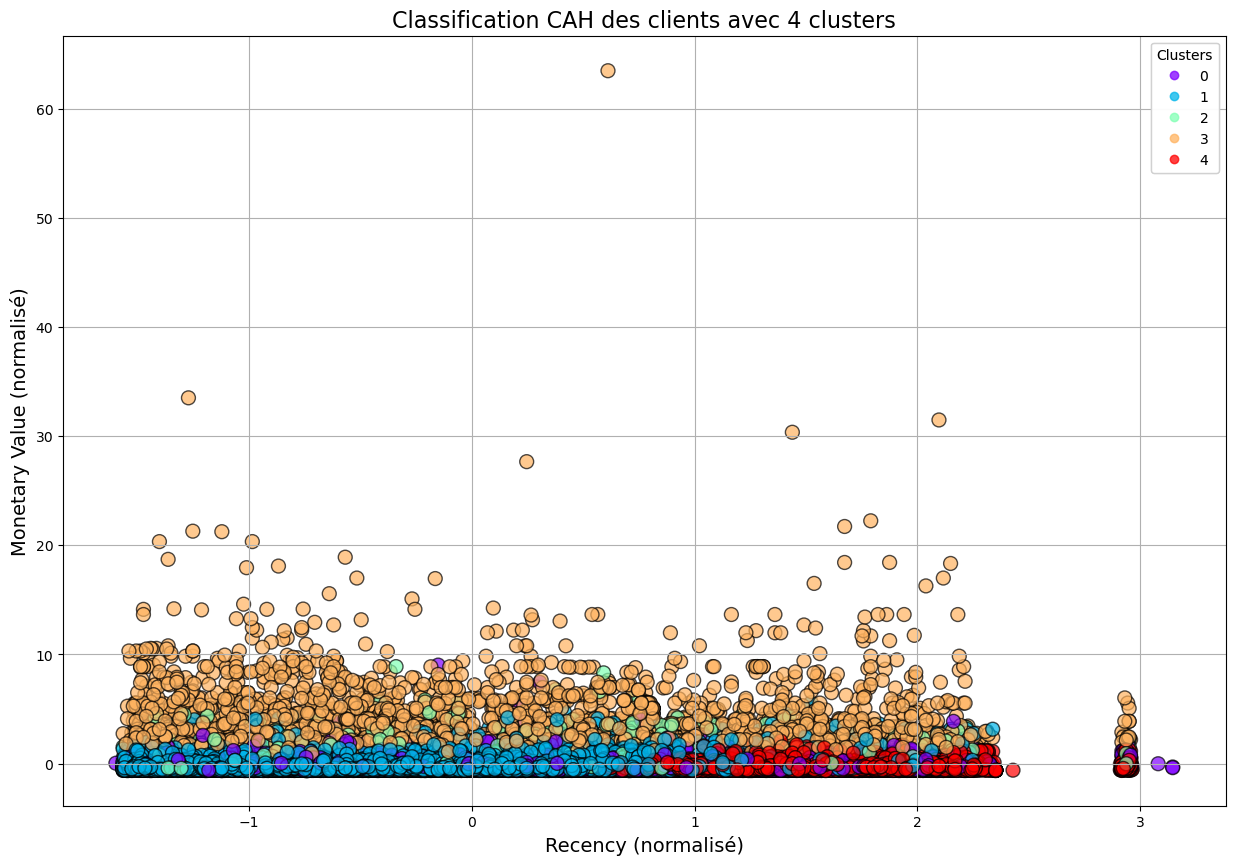

                        customer_id  kmeans_cluster  cah_cluster  \
0  00012a2ce6f8dcda20d059ce98491703             2.0          0.0   
1  000161a058600d5901f007fab4c27140             1.0          1.0   
2  0001fd6190edaaf884bcaf3d49edf079             1.0          4.0   
3  0002414f95344307404f0ace7a26f1d5             1.0          4.0   
4  000379cdec625522490c315e70c7a9fb             0.0          1.0   

   dbscan_cluster  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# 1. Préparation et normalisation des données
X = rfm_df[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']]

# Vérifier et gérer les valeurs manquantes
#X = X.dropna()  # Supprime les lignes avec des valeurs manquantes
X = X.fillna(X.mean())

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Clustering avec KMeans
# Trouver le nombre optimal de clusters avec la méthode du coude
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)  # Explicitement définir n_init à 10
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Méthode du coude pour KMeans")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()

# Appliquer KMeans avec un nombre de clusters choisi (par exemple : 4)
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)  # Explicitement définir n_init à 10
rfm_df.loc[X.index, 'kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# 3. Clustering avec CAH (Dendrogramme)
plt.figure(figsize=(10, 6))

# Dendrogramme avec un maximum de 10 clusters
dendrogram = sch.dendrogram(
    sch.linkage(X_scaled, method='ward'),
    truncate_mode='lastp',  # Limiter le nombre de clusters affichés
    p=12,                   # Nombre maximum de clusters à afficher
)

plt.title('Dendrogramme pour CAH (maximum 10 clusters)')
plt.xlabel('Clients')
plt.ylabel('Distance')
plt.show()

# Appliquer CAH avec découpage en clusters (par exemple : 4 clusters)
cah = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
rfm_df.loc[X.index, 'cah_cluster'] = cah.fit_predict(X_scaled)

# Afficher la classification CAH avec amélioration de la lisibilité
plt.figure(figsize=(15, 10))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cah.labels_, cmap='rainbow', edgecolor='k', s=100, alpha=0.7)

# Ajouter un titre descriptif
plt.title("Classification CAH des clients avec 4 clusters", fontsize=16)
plt.xlabel('Recency (normalisé)', fontsize=14)
plt.ylabel('Monetary Value (normalisé)', fontsize=14)

# Ajouter une légende
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.grid(True)
plt.show()

# 4. Clustering avec DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm_df.loc[X.index, 'dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Afficher un aperçu des clusters
print(rfm_df[['customer_id', 'kmeans_cluster', 'cah_cluster', 'dbscan_cluster']].head())
